<a href="https://colab.research.google.com/github/sanchaldhurve/Amazon-Baby-Product-Reviews-Analysis/blob/main/ai_sentiment_analysis_product_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Baby Products Reviews Analysis
**Author:** Sanchal Dhurve

In [ ]:
%pip install seaborn

In [ ]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [ ]:
#if using local
Data_F = pd.read_csv('amazon_baby_final.csv')


In [ ]:
len(Data_F)

183531

In [ ]:
Data_baby = Data_F.head(2000)

In [ ]:
Data_baby.head(10)

,name,review,rating,category,sentiment
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,Diapers & Potty Training,Neutral
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,Diapers & Potty Training,Positive
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Bedding,Positive
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,Toys & Books,Positive
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,Toys & Books,Positive
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,Toys & Books,Positive
6,A Tale of Baby's Days with Peter Rabbit,"Lovely book, it's bound tightly so you may not...",4,Toys & Books,Positive
7,"Baby Tracker&reg; - Daily Childcare Journal, S...",Perfect for new parents. We were able to keep ...,5,Toys & Books,Positive
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",A friend of mine pinned this product on Pinter...,5,Toys & Books,Positive
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4,Toys & Books,Positive


In [ ]:
# ********** AI Sentiment Model **************

In [ ]:
!pip install transformers torch


In [ ]:
from transformers import pipeline

# Load pre-trained sentiment model
sentiment_model = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

# Function to classify sentiment
def get_ai_sentiment(review):
    try:
        result = sentiment_model(review[:512])[0]  # truncate long reviews to 512 tokens
        label = result['label']
        if label == "LABEL_0":
            return "Negative"
        elif label == "LABEL_1":
            return "Neutral"
        elif label == "LABEL_2":
            return "Positive"
        else:
            return label
    except:
        return "Unknown"

# Apply to a sample (you can scale later)
Data_baby['ai_sentiment'] = Data_baby['review'].astype(str).apply(get_ai_sentiment)

# Preview results
Data_baby[['review', 'sentiment', 'ai_sentiment']].head(10)


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
/tmp/ipython-input-2883546702.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,review,sentiment,ai_sentiment
0,"These flannel wipes are OK, but in my opinion ...",Neutral,negative
1,it came early and was not disappointed. i love...,Positive,positive
2,Very soft and comfortable and warmer than it l...,Positive,positive
3,This is a product well worth the purchase. I ...,Positive,positive
4,All of my kids have cried non-stop when I trie...,Positive,positive
5,"When the Binky Fairy came to our house, we did...",Positive,positive
6,"Lovely book, it's bound tightly so you may not...",Positive,positive
7,Perfect for new parents. We were able to keep ...,Positive,positive
8,A friend of mine pinned this product on Pinter...,Positive,positive
9,This has been an easy way for my nanny to reco...,Positive,positive


In [ ]:


Data_baby['ai_sentiment'] = Data_baby['ai_sentiment'].str.title()

Data_baby.head(10)

/tmp/ipython-input-2407230087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_baby['ai_sentiment'] = Data_baby['ai_sentiment'].str.title()


,name,review,rating,category,sentiment,ai_sentiment
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,Diapers & Potty Training,Neutral,Negative
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,Diapers & Potty Training,Positive,Positive
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Bedding,Positive,Positive
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,Toys & Books,Positive,Positive
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,Toys & Books,Positive,Positive
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,Toys & Books,Positive,Positive
6,A Tale of Baby's Days with Peter Rabbit,"Lovely book, it's bound tightly so you may not...",4,Toys & Books,Positive,Positive
7,"Baby Tracker&reg; - Daily Childcare Journal, S...",Perfect for new parents. We were able to keep ...,5,Toys & Books,Positive,Positive
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",A friend of mine pinned this product on Pinter...,5,Toys & Books,Positive,Positive
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4,Toys & Books,Positive,Positive


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Compare your sentiment column vs AI-generated one
y_true = Data_baby['sentiment']        # your original sentiment column
y_pred = Data_baby['ai_sentiment']     # AI model’s sentiment

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=["Negative", "Neutral", "Positive"])


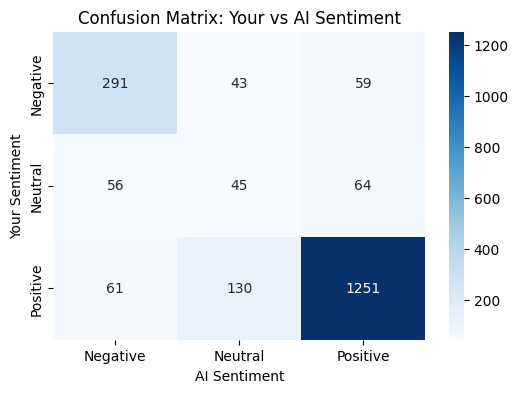

In [ ]:

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("AI Sentiment")
plt.ylabel("Your Sentiment")
plt.title("Confusion Matrix: Your vs AI Sentiment")
plt.show()



In [ ]:

# Classification report (precision, recall, f1-score)
print(classification_report(y_true, y_pred, target_names=["Negative", "Neutral", "Positive"]))

              precision    recall  f1-score   support

    Negative       0.71      0.74      0.73       393
     Neutral       0.21      0.27      0.23       165
    Positive       0.91      0.87      0.89      1442

    accuracy                           0.79      2000
   macro avg       0.61      0.63      0.62      2000
weighted avg       0.81      0.79      0.80      2000



In [ ]:

from google.colab import files


# Save the DataFrame to a CSV file in the Colab environment
Data_baby.to_csv('Amazon_sentiment.csv', index=False)

# index=False prevents writing the DataFrame index as a column

# Download the file to your local machine
files.download('Amazon_sentiment.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>